## VGGNet (2014)
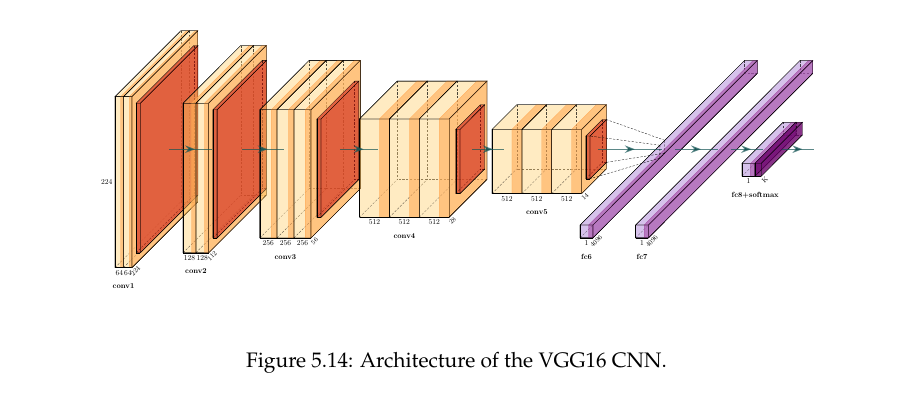

* En general
    * Es del Visual Geometry Group (VGG). De Oxford.
    * Hay varias arquitecturas: VGG16, VGG19, etc.
    * Nosotros nos quedamos con la VGG16.
    * Publicada en 2013 por Karen Simonyan y Andrew Sisserman. (la publacion esta referida en las notas de clase).
    * Ganador de primero y segundo lugar en el ImageNet Challenge en 2014. Con 92.7% top-5 accuracy.
    * 1000 etiquetas, sobre 14 millones de imagenes.
    * Las redes convolucionales son de 3x3.
    * Tiene 11 redes convolucionales, mientras que el AlexNet tiene solo 5.
    * Pooling de 2x2 co stride=2.

* Detalles
    * Todas las convoluciones tienen ```padding='same```
    * La capa de entrada y primeras convoluciones. Hay dos convoluciones consecutivas y seguidas de un pooling layer. Los datos entrada son $224 \times 224 \times 3 $ (RGB). Salida de 64 filtros. Pooling 2x2 stride $s=2$. El pooling es MaxPooling.
    * Segunda capa de convoluciones. con 128 filtros. Seguida por MaxPooling.
    * Tercera capa de 3 convoluciones, numero de filtros 256 y MaxPooling.
    * Cuarta capa de 3 convoluciones de 512 filtros y MaxPooling.
    * Quinta capa: 3 convoluciones de 512 filtros seguida de MaxPooling.
    * Sexta capa: Flattening. Sale un vector de 4096 (creo esta es convolucion. Lo vemos en la implementacion).
    * Fully connected de 4096 nodos.
    * Fully connected. Softmax de 1000 clases de salida. (para nosotros 17).




Por favor ver la implemantacion en la pagina 162 de las notas de clase en version obsoleta de Tensorflow.

En ```keras``` el parametro  ```padding='same'```
quiere decir que la salida tiene el mismo numero de $nx,ny$ que la entrada (recuerde que el $nz$ es el numero de filtros). En el caso del VGGNet el kernel es de $(3 \times 3)$. Entonces padding same es p=1.
Pues:

$(nx-k+2p)/s +1$, $(nx-3+2)/1 + 1 = nx -3 + 2 +1 = nx$

Un ejercicio para los estudiantes es. Una convolucion de filtro $k \times k$ que $p$ debe tener para padding same si el stride es $s$.
Solo tomamos $nx$ (por que los filtros son cuadrados)

La ecuacion que debemos resolver es:


$$(nx - k + 2p)/s + 1 = nx $$
Es decir
$$ nx -k + 2p = s(nx-1) .$$
$$ p = \frac{s(nx-1) -nx + k}{2} .$$
$$ p = \frac{(s-1)nx -s  + k}{2} .$$

Vamos a ver una implementacion tomada de
[d2l](https://colab.research.google.com/github/d2l-ai/d2l-en-colab/blob/master/chapter_convolutional-modern/vgg.ipynb).



In [10]:
!pip install d2l==1.0.3
!pip install -U mxnet-cu112==1.9.1

In [11]:
# importamos las librerias del mxnet
from mxnet import init, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [12]:
# definimos un VGG block
def vgg_block(num_convs, num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels, kernel_size=3,
                          padding=1, activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2, strides=2))
    return blk

Comparacion con AlexNet
![Comparacion con AlexNet](http://d2l.ai/_images/vgg.svg)

In [13]:
# construimos la arquitectura del vgg como una clase
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10): # MNIST
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential()
        for (num_convs, num_channels) in arch:
            self.net.add(vgg_block(num_convs, num_channels))
        self.net.add(nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
                     nn.Dense(4096, activation='relu'), nn.Dropout(0.5),
                     nn.Dense(num_classes))
        self.net.initialize(init.Xavier)

In [14]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

AssertionError: ignored

In [ ]:
#Training
model = VGG(arch=((1,16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)

trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer.fit(model,data)
